<a href="https://colab.research.google.com/github/Eshita781996/AirQualtityIndex/blob/main/Air_Quality_Index_Prediction_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/city_day.csv')

In [8]:
df1['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [9]:
df = df1[df1['City']=='Delhi']

In [10]:
df.shape

(2009, 16)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 10229 to 12237
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   Date        2009 non-null   object 
 2   PM2.5       2007 non-null   float64
 3   PM10        1932 non-null   float64
 4   NO          2007 non-null   float64
 5   NO2         2007 non-null   float64
 6   NOx         2009 non-null   float64
 7   NH3         2000 non-null   float64
 8   CO          2009 non-null   float64
 9   SO2         1899 non-null   float64
 10  O3          1925 non-null   float64
 11  Benzene     2009 non-null   float64
 12  Toluene     2009 non-null   float64
 13  Xylene      1228 non-null   float64
 14  AQI         1999 non-null   float64
 15  AQI_Bucket  1999 non-null   object 
dtypes: float64(13), object(3)
memory usage: 266.8+ KB


In [12]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,2
PM10,77
NO,2
NO2,2
NOx,0
NH3,9
CO,0
SO2,110


In [13]:
df= df.drop(['Xylene','Toluene','Benzene','O3','CO','SO2'], axis=1)

In [14]:
df = df.dropna()

<Axes: >

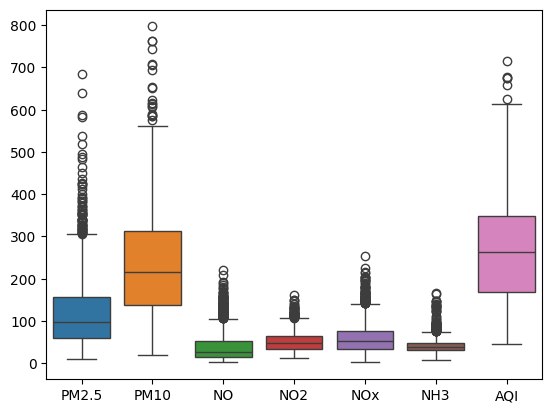

In [18]:
sns.boxplot(data=df)

In [19]:
drop_outlier = df[(df['AQI']>500) | (df['PM2.5']>180) | (df['NO']>65) |(df['NH3']>50) | (df['NO2']>90) | (df['NOx']>100) | (df['PM10']>450)].index

In [20]:
df = df.drop(drop_outlier)

<Axes: >

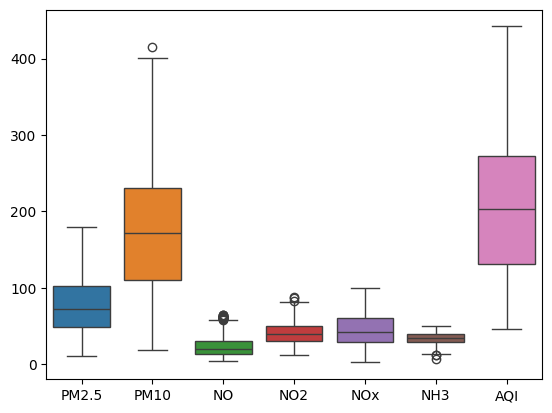

In [21]:
sns.boxplot(data= df)

<Axes: xlabel='AQI', ylabel='PM2.5'>

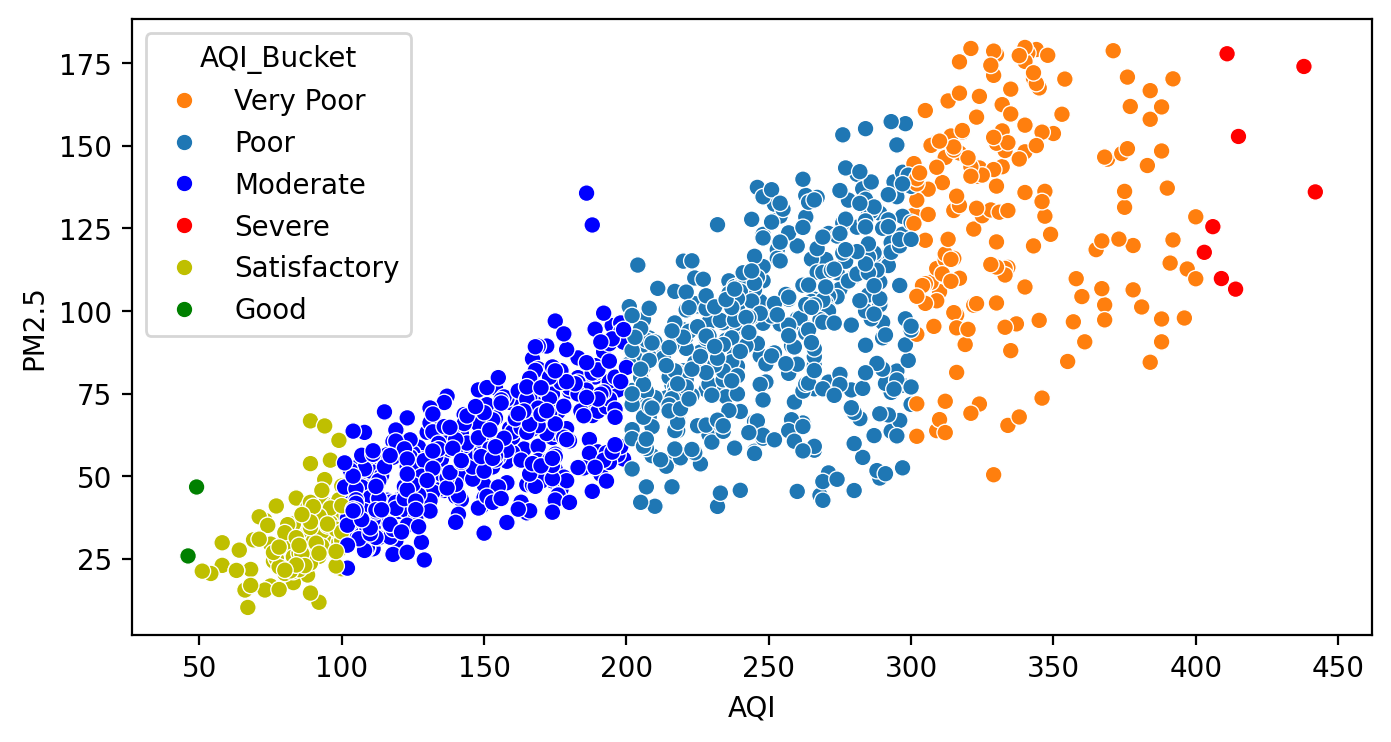

In [23]:
plt.figure(figsize=(8,4),dpi=200)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'PM2.5', data=df,hue ='AQI_Bucket',palette = palette)

<Axes: xlabel='AQI', ylabel='NO2'>

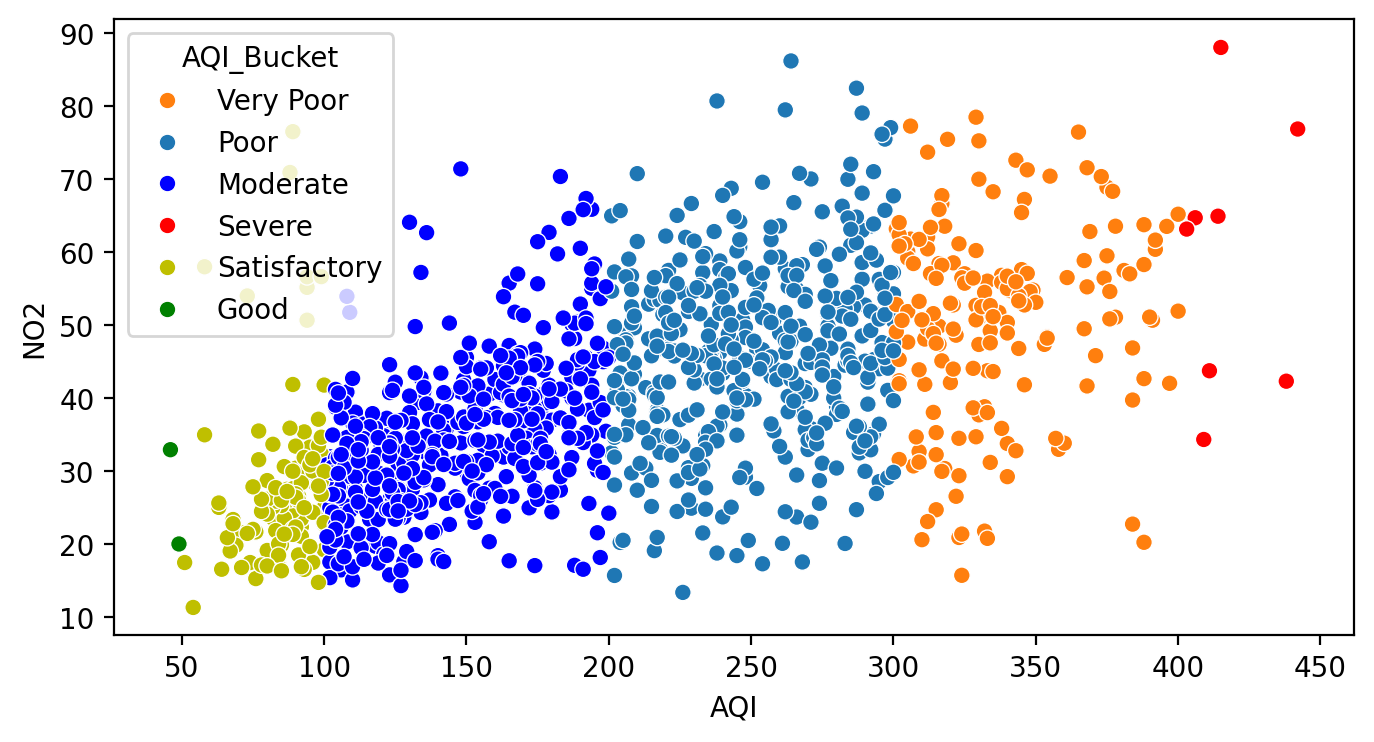

In [25]:
plt.figure(figsize=(8,4),dpi=200)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'NO2', data=df,hue ='AQI_Bucket',palette = palette)

<Axes: xlabel='AQI', ylabel='NH3'>

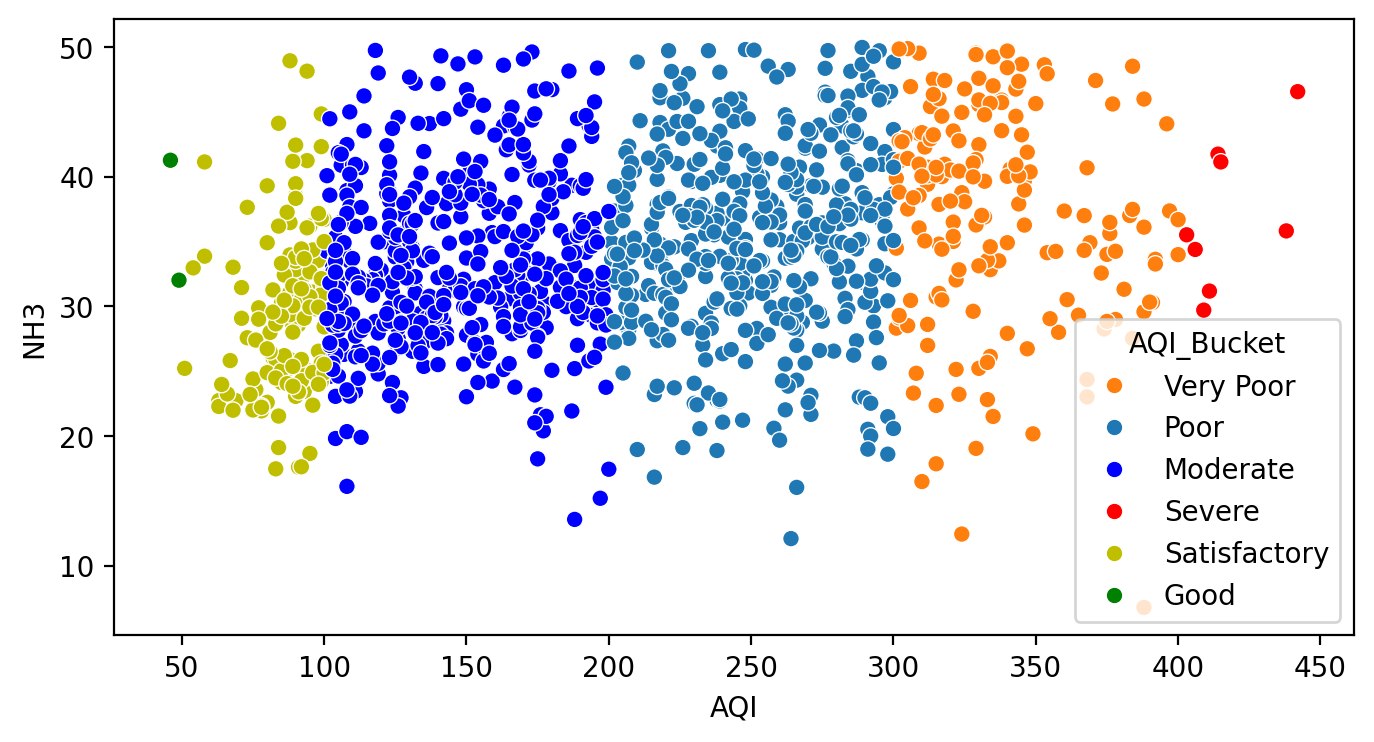

In [27]:
plt.figure(figsize=(8,4),dpi=200)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'NH3', data=df,hue ='AQI_Bucket',palette = palette)

<Axes: xlabel='AQI', ylabel='NOx'>

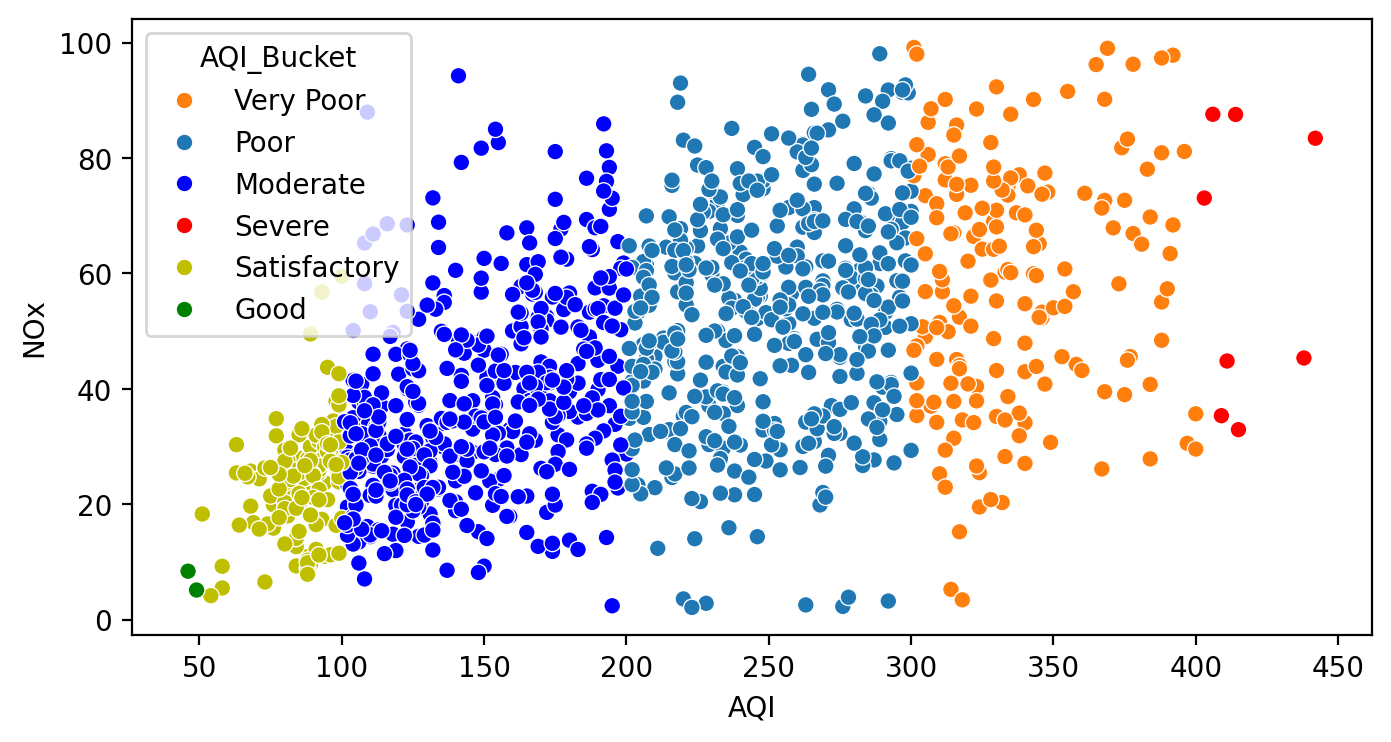

In [29]:
plt.figure(figsize=(8,4),dpi=200)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'NOx', data=df,hue ='AQI_Bucket',palette = palette)

<Axes: xlabel='AQI', ylabel='PM10'>

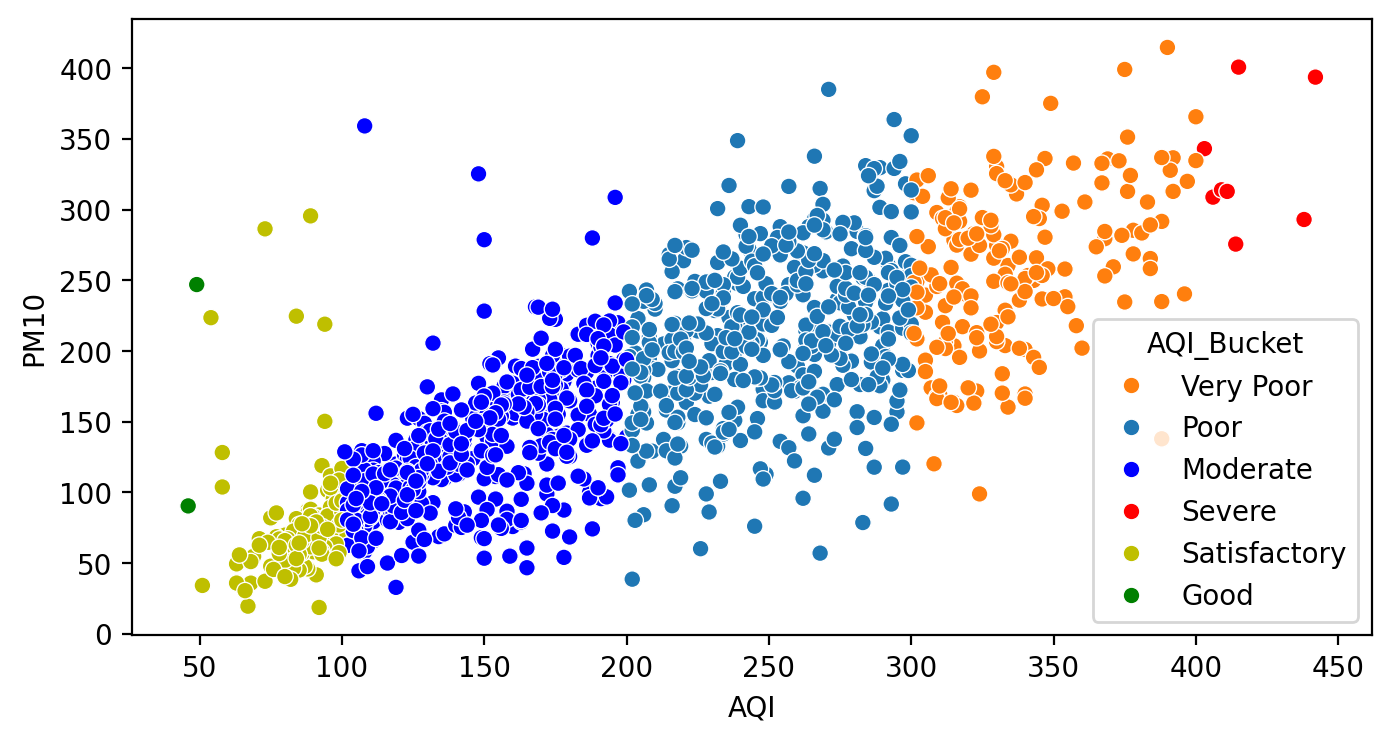

In [30]:
plt.figure(figsize=(8,4),dpi=200)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'PM10', data=df,hue ='AQI_Bucket',palette = palette)

In [31]:
drop_outlier1 = df[(df['AQI']<165) & (df['PM10']>200)].index
drop_outlier2 = df[(df['AQI']>200) & (df['PM10']<110)].index
df = df.drop(drop_outlier1)
df = df.drop(drop_outlier2)

<Axes: xlabel='AQI', ylabel='PM10'>

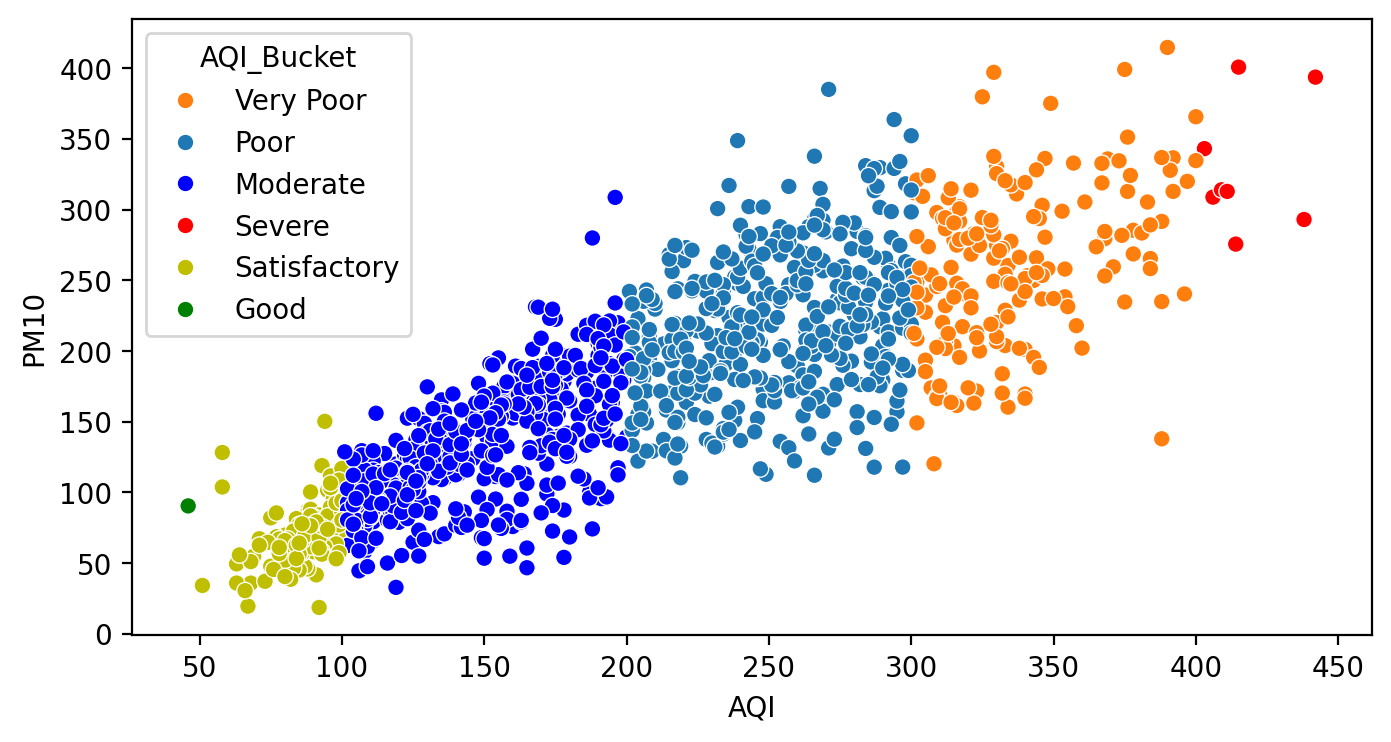

In [32]:
plt.figure(figsize=(8,4),dpi=200)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'PM10', data=df,hue ='AQI_Bucket',palette = palette)

<Axes: xlabel='AQI', ylabel='PM2.5'>

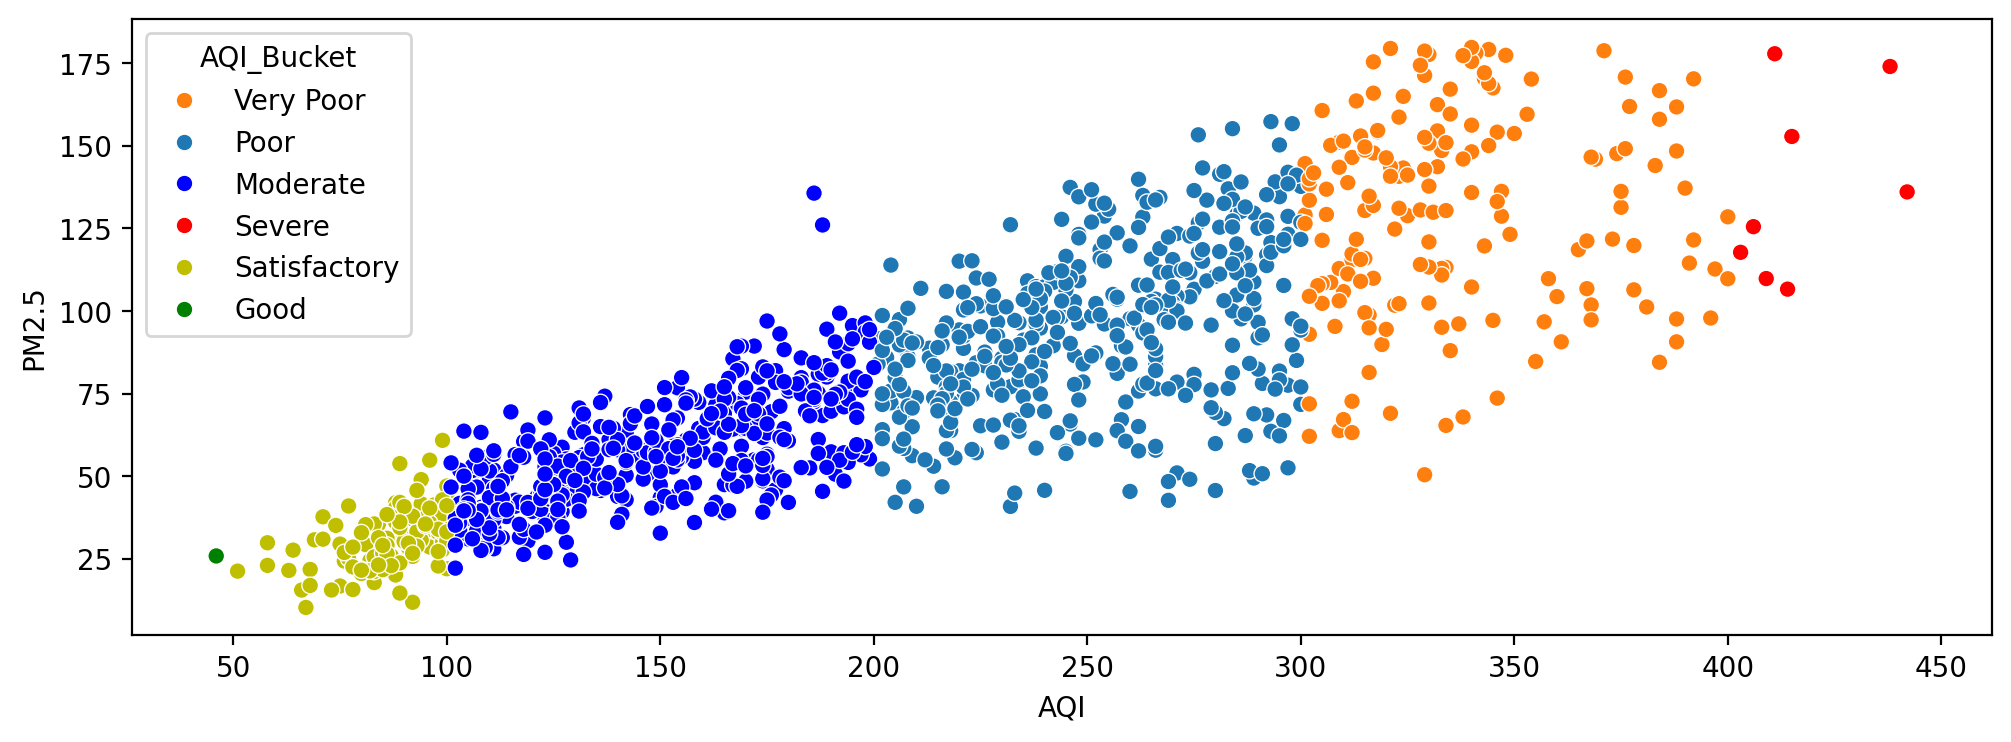

In [33]:
plt.figure(figsize=(12,4),dpi=200)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'PM2.5', data=df,hue ='AQI_Bucket',palette = palette)

In [34]:
X= df.drop(['City', 'AQI_Bucket', 'AQI', 'NH3','NOx','NO','Date'], axis= 1)

In [35]:
y= df['AQI']

<Axes: >

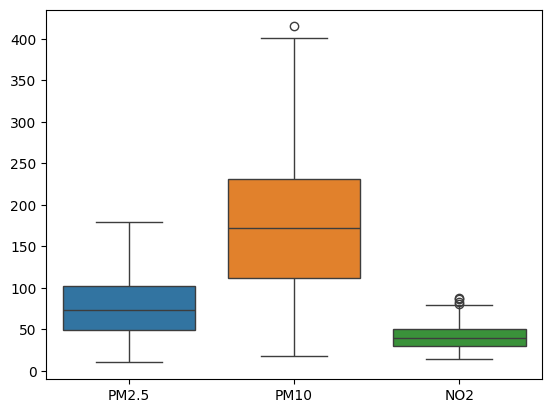

In [36]:
sns.boxplot(data=X)

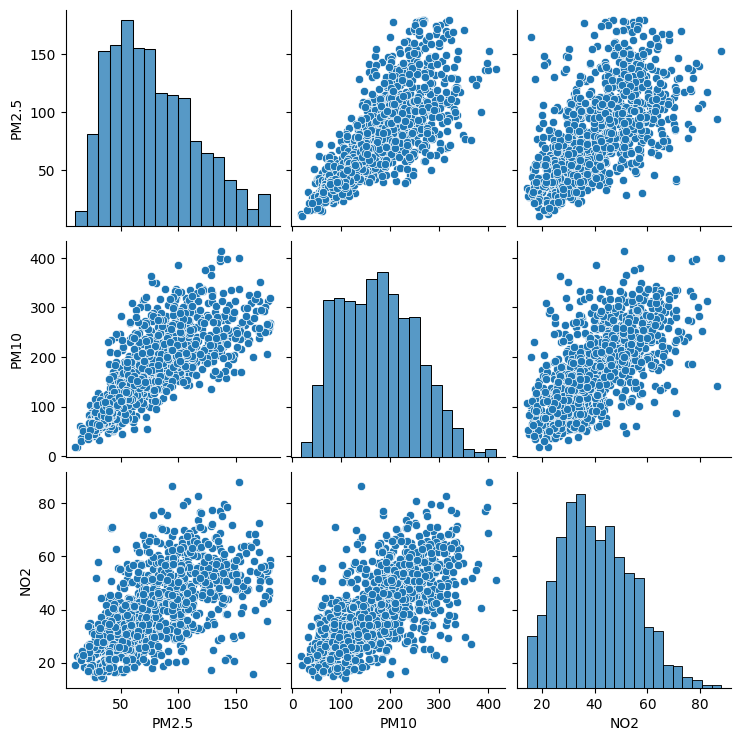

In [37]:
sns.pairplot(data=X)

In [41]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


In [42]:
scaled_X_train = Scaler.fit_transform(X_train)
scaled_X_test = Scaler.transform(X_test)

In [44]:
from sklearn.svm import SVR
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [47]:
from sklearn.model_selection import GridSearchCV
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [48]:
model_predict=grid.predict(scaled_X_test)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(model_predict, y_test)
np.sqrt(mean_squared_error(y_test,model_predict))


In [50]:
x=np.arange(0,len(y_test))
print(x)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

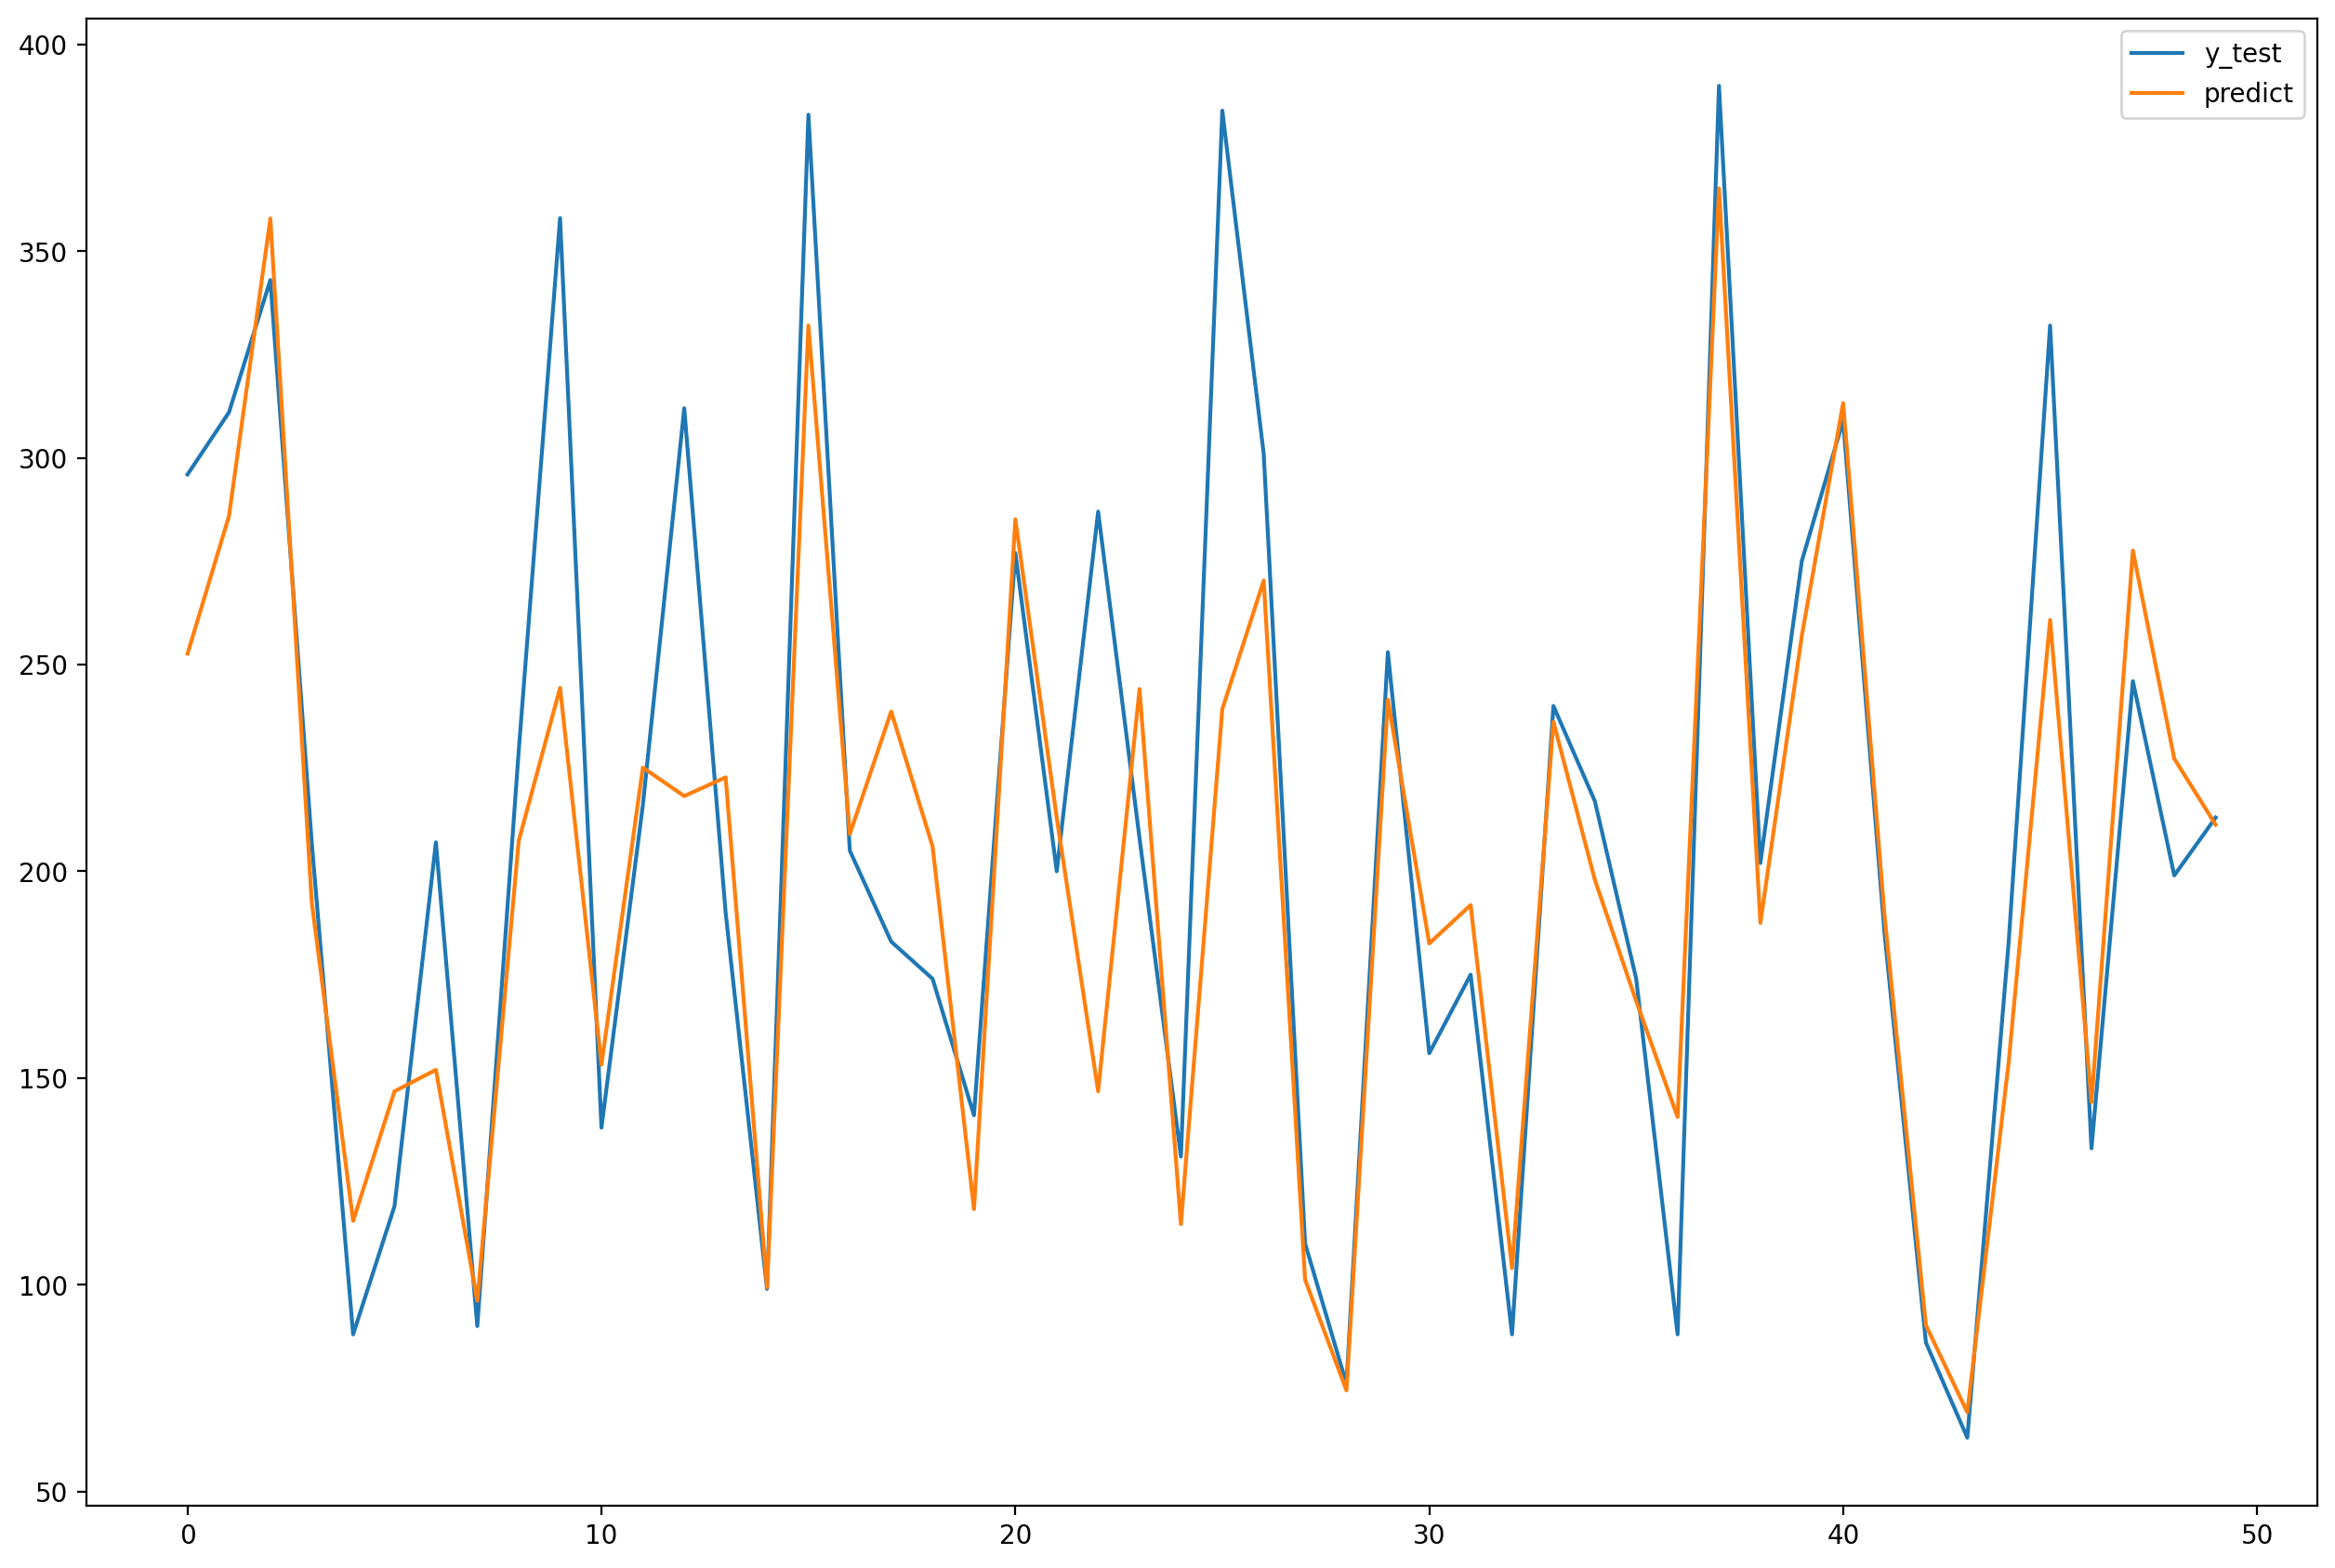

In [51]:
fig = plt.figure(figsize =(12,8), dpi=200)

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x[0:50], y_test[0:50], label='y_test')
axes.plot(x[0:50], model_predict[0:50], label='predict')
plt.legend()
plt.show()